In [1]:
from point import Point
from squareLattice import SquareLattice
from simulator import Simulator
from utils import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lattice_big = SquareLattice(0.2, 0.02)

100%|██████████| 15625/15625 [00:00<00:00, 561451.60it/s]


In [3]:
simulator_big = Simulator(lattice_big, sqr = 0)

100%|██████████| 15625/15625 [00:00<00:00, 565175.02it/s]


In [4]:
stats = simulator_big.step(3000000, 1000000)

100%|██████████| 3000000/3000000 [3:22:25<00:00, 247.00it/s]  


In [5]:
ret, Yb_0, Yb_1, Tm_0, Tm_1, Tm_2 = stats

In [6]:
ret

[244263, 190543, 46111, 3484, 3343, 0]

In [7]:
sum(Yb_0)/len(Yb_0), sum(Yb_1)/len(Yb_1),sum(Tm_0)/len(Tm_0),sum(Tm_1)/len(Tm_1),sum(Tm_2)/len(Tm_2)

(14140.595772, 63.404228, 1405.476761, 15.3559685, 0.1672705)

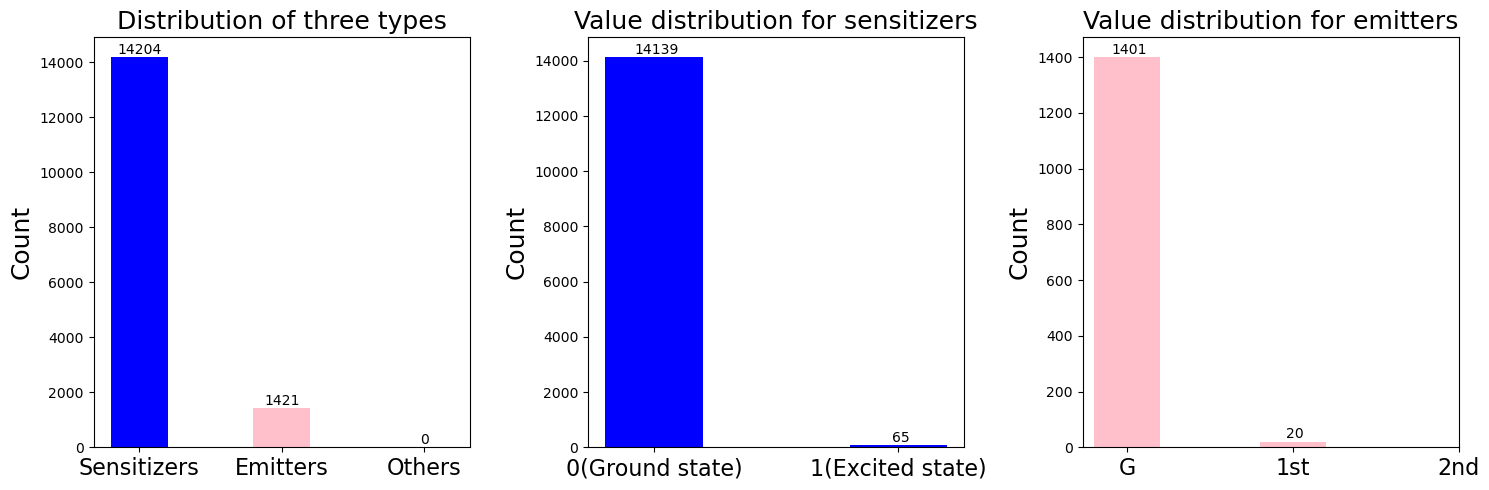

In [8]:
simulator_big.lattice.plot_distributions()

In [2]:
tag_default={'S1S0':100000, # energy transfer
     'c1':2.5*10**4,'c2':3.2*10**3, # upconversion
     'Ws':1000, # decay of sensitizer
     'W10':1000, 'W20':7000, # decay of activator
     'A1S0': 10000, # activator transfer energy back to sensitizer
     'A1A0': 5000, 'A1A1':600, # activator cross relaxation 
     'laser': 5.76*10**(-6)} # 100W

In [3]:
lattice_power = SquareLattice(0.2, 0.02)

100%|██████████| 15625/15625 [00:00<00:00, 558528.00it/s]


In [4]:
powers = [100, 200, 400, 600, 800, 1000, 2000, 4000, 8000, 10000, 20000, 30000, 40000]
uc_intensities = []
for w in powers:
    tag_new = tag_default.copy()
    tag_new['laser'] = tag_default['laser']/100*w
    simulator_power = Simulator(lattice_power, tag =tag_new)
    ret, Yb_0, Yb_1, Tm_0, Tm_1, Tm_2 = simulator_power.step(300000, 100000)
    uc_intensities.append(ret[4])
    print(w, ret)
    print(sum(Yb_0)/len(Yb_0), sum(Yb_1)/len(Yb_1),sum(Tm_0)/len(Tm_0),sum(Tm_1)/len(Tm_1),sum(Tm_2)/len(Tm_2))

100%|██████████| 300000/300000 [20:01<00:00, 249.70it/s]


100 [24447, 18991, 4630, 339, 321, 0]
14140.31563 63.68437 1405.39655 15.45436 0.14909


100%|██████████| 300000/300000 [21:03<00:00, 237.42it/s]


200 [48619, 36687, 8855, 1339, 1271, 0]
14081.938915 122.061085 1391.11321 29.243885 0.642905


100%|██████████| 300000/300000 [22:55<00:00, 218.17it/s]


400 [96158, 69351, 16386, 4676, 4466, 0]
13972.35817 231.64183 1363.72712 54.964695 2.308185


100%|██████████| 300000/300000 [24:30<00:00, 204.00it/s]


600 [143714, 99744, 22939, 9403, 9010, 0]
13872.29119 331.70881 1339.12327 77.337575 4.539155


100%|██████████| 300000/300000 [25:46<00:00, 193.97it/s]


800 [190055, 127065, 29437, 14967, 14313, 0]
13779.90296 424.09704 1316.32533 97.62594 7.04873


100%|██████████| 300000/300000 [27:11<00:00, 183.93it/s]


1000 [236560, 153691, 34757, 21486, 20573, 0]
13692.051655 511.948345 1294.417625 116.418285 10.16409


100%|██████████| 300000/300000 [33:36<00:00, 148.74it/s]


2000 [460329, 265202, 56654, 61006, 58630, 0]
13315.062995 888.937005 1201.494215 190.46041 29.045375


100%|██████████| 300000/300000 [42:09<00:00, 118.59it/s]


4000 [878480, 440802, 85670, 151286, 145789, 0]
12729.729845 1474.270155 1062.194585 286.84792 71.957495


100%|██████████| 300000/300000 [55:20<00:00, 90.34it/s] 


8000 [1638537, 710120, 117674, 333587, 323019, 0]
11834.106975 2369.893025 868.86955 393.09334 159.03711


100%|██████████| 300000/300000 [59:40<00:00, 83.80it/s]


10000 [1980171, 822192, 127368, 416079, 403623, 0]
11459.350725 2744.649275 797.510875 425.59613 197.892995


100%|██████████| 300000/300000 [1:17:55<00:00, 64.16it/s]


20000 [3441486, 1271251, 149744, 752307, 734635, 0]
9957.373775 4246.626225 561.852025 501.781715 357.36626


100%|██████████| 300000/300000 [1:29:32<00:00, 55.84it/s]


30000 [4580539, 1609332, 155531, 983044, 963342, 0]
8833.13131 5370.86869 432.690415 521.774955 466.53463


100%|██████████| 300000/300000 [1:37:52<00:00, 51.09it/s]

40000 [5494937, 1877859, 156209, 1146166, 1125946, 0]
7946.530105 6257.469895 352.613395 523.01289 545.373715


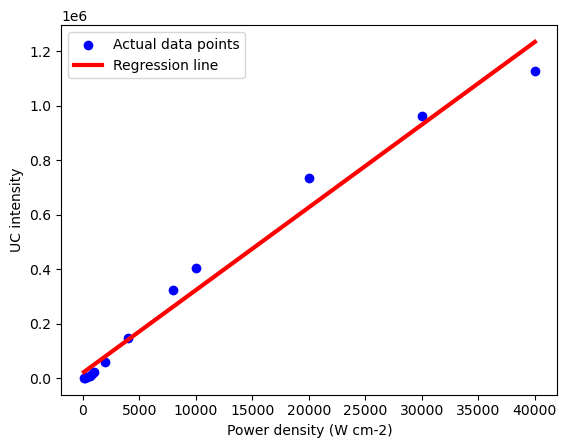

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x = np.array(powers).reshape(-1, 1) # np.array([25*i for i in range(21, 26)]).reshape(-1, 1)
y = uc_intensities
model = LinearRegression()
model.fit(x, y)
plt.scatter(x, y, color='blue', label='Actual data points')
y_pred = model.predict(x)
plt.plot(x, y_pred, color='red', linewidth=3, label='Regression line')
plt.xlabel('Power density (W cm-2)')
plt.ylabel('UC intensity')
plt.legend()
plt.show()

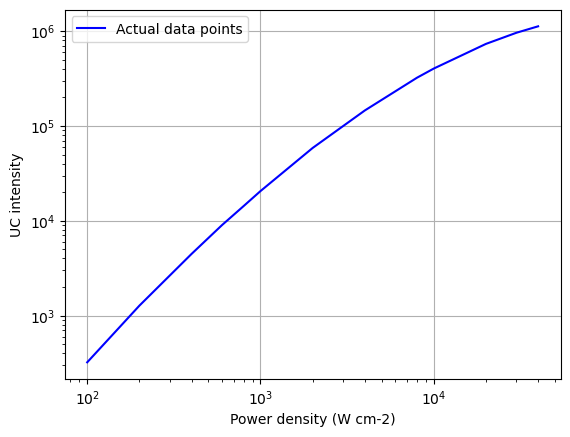

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming powers and uc_intensities are defined
x = np.array(powers).reshape(-1, 1)
y = uc_intensities


plt.plot(x, y, color='blue', label='Actual data points')

plt.xscale('log')  # Set log scale for x-axis
plt.yscale('log')  # Set log scale for y-axis

plt.xlabel('Power density (W cm-2)')
plt.ylabel('UC intensity')
plt.legend()
plt.grid(True)
plt.show()

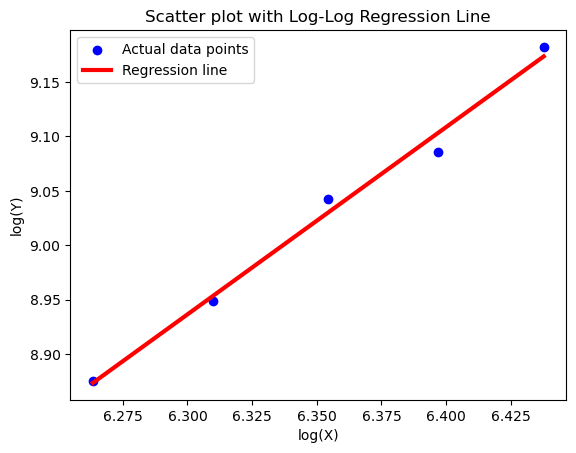

In [4]:
log_x = np.log(x)
log_y = np.log(y)

model = LinearRegression()
model.fit(log_x, log_y)

# Scatter plot of the log-transformed data points
plt.scatter(log_x, log_y, color='blue', label='Actual data points')

# Predict on the log-transformed x values
log_y_pred = model.predict(log_x)

# Plot the regression line on the log-transformed scale
plt.plot(log_x, log_y_pred, color='red', linewidth=3, label='Regression line')

# Add labels and legend
plt.xlabel('log(X)')
plt.ylabel('log(Y)')
plt.title('Scatter plot with Log-Log Regression Line')
plt.legend()

# Show the plot
plt.show()

In [1]:
model.coef_

NameError: name 'model' is not defined

In [9]:
lattice_big = SquareLattice(0.2, 0.02)

100%|██████████| 15625/15625 [00:00<00:00, 563731.14it/s]


In [10]:
simulator_big = Simulator(lattice_big, sqr = 0)

100%|██████████| 15625/15625 [00:00<00:00, 558442.33it/s]


100%|██████████| 1000/1000 [00:04<00:00, 222.68it/s]


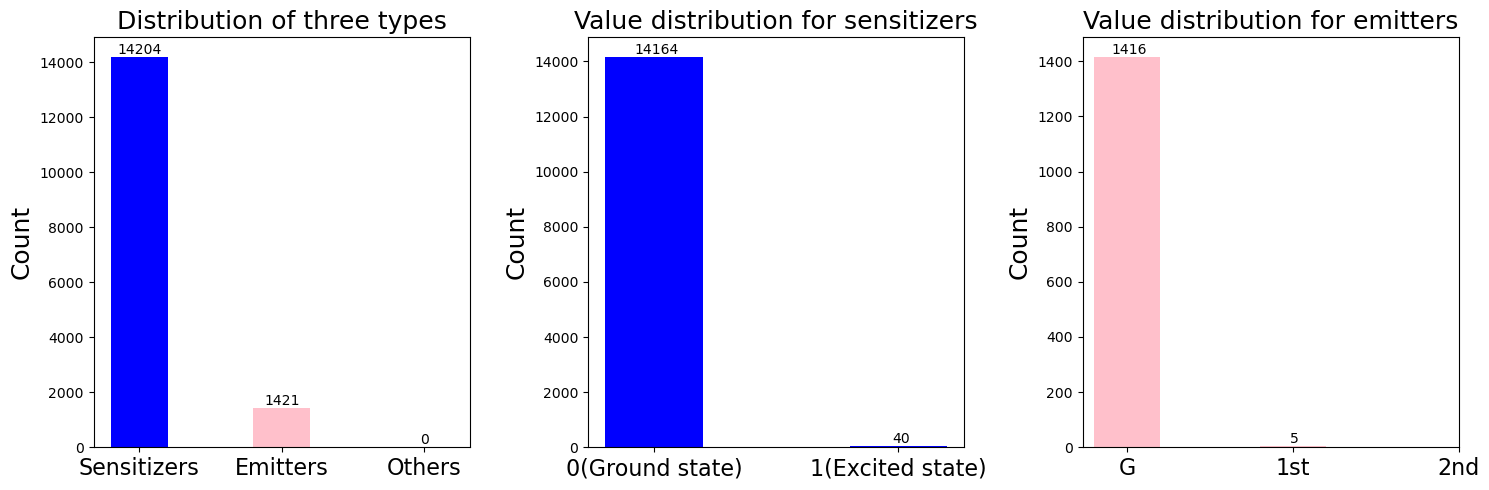

100%|██████████| 1000/1000 [00:04<00:00, 219.09it/s]


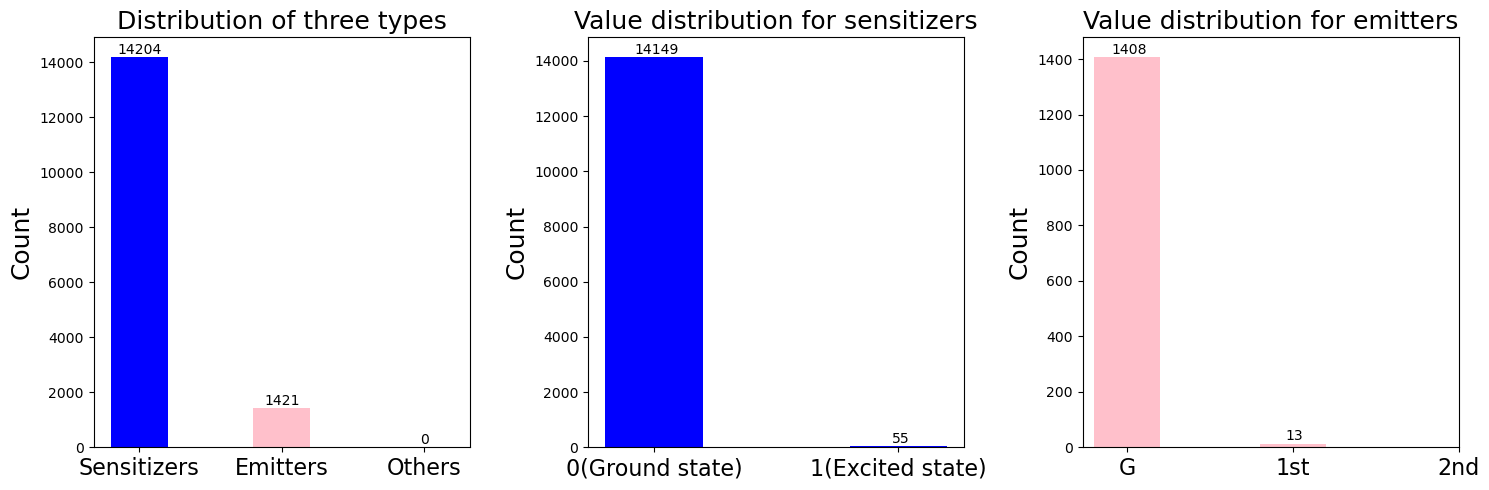

100%|██████████| 1000/1000 [00:04<00:00, 218.49it/s]


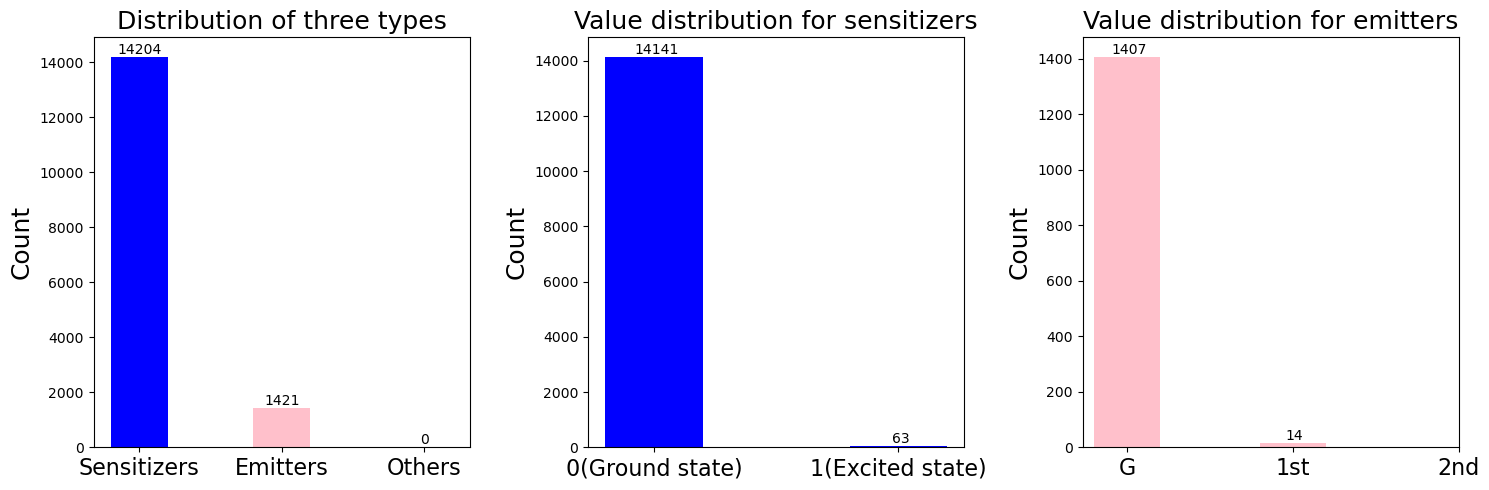

100%|██████████| 1000/1000 [00:04<00:00, 216.15it/s]


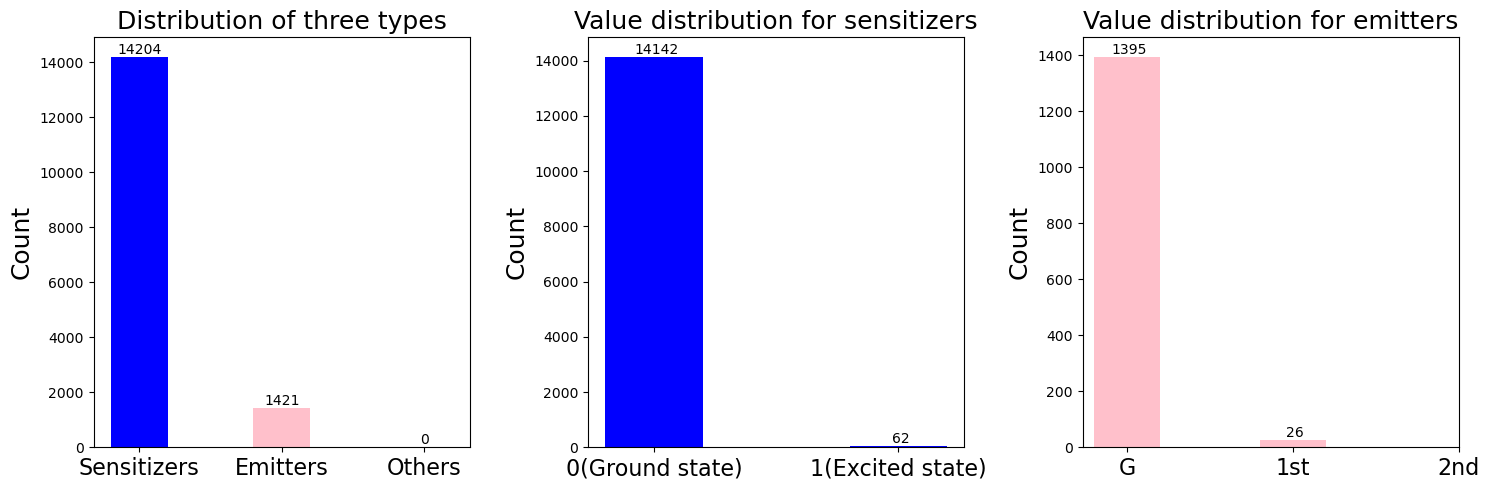

100%|██████████| 1000/1000 [00:04<00:00, 215.48it/s]


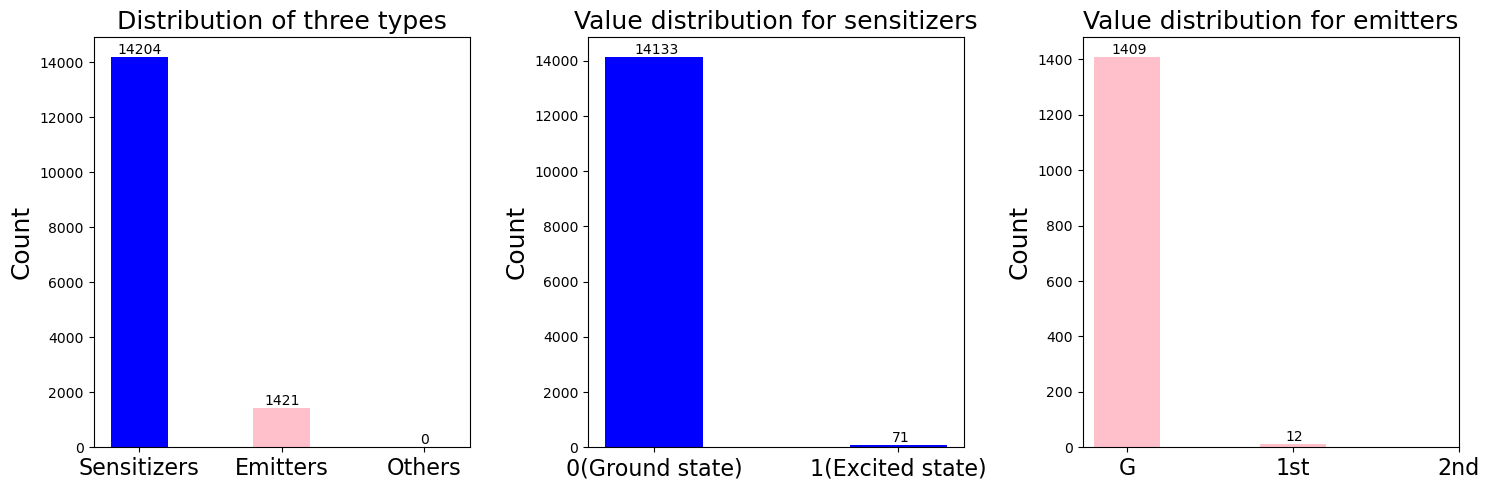

100%|██████████| 1000/1000 [00:04<00:00, 215.94it/s]


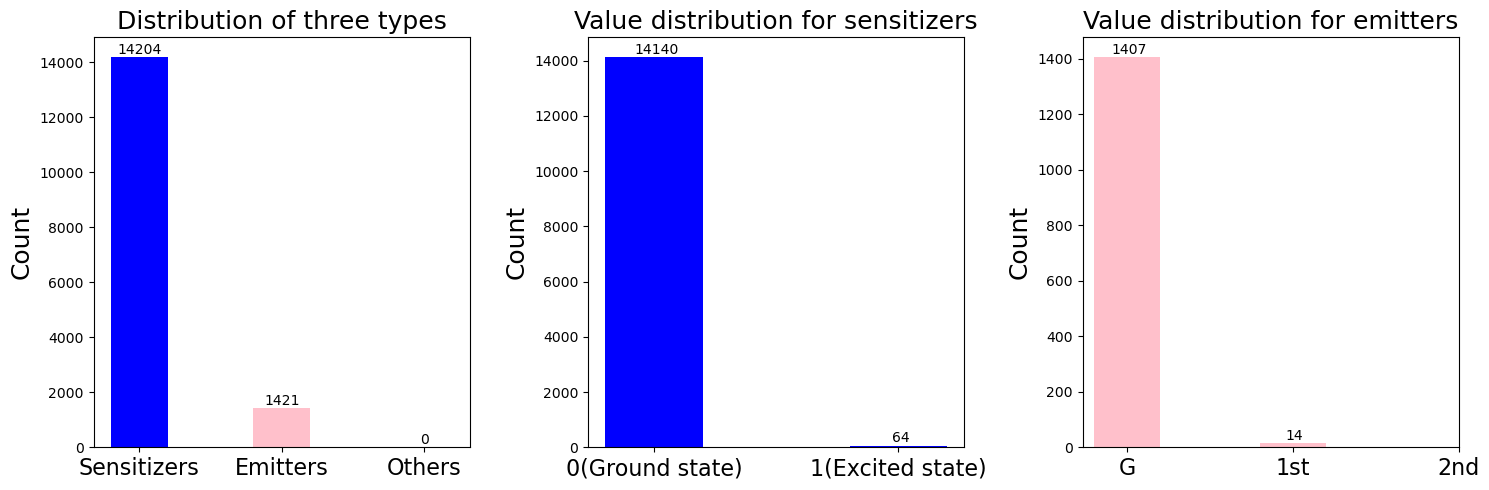

100%|██████████| 1000/1000 [00:04<00:00, 216.97it/s]


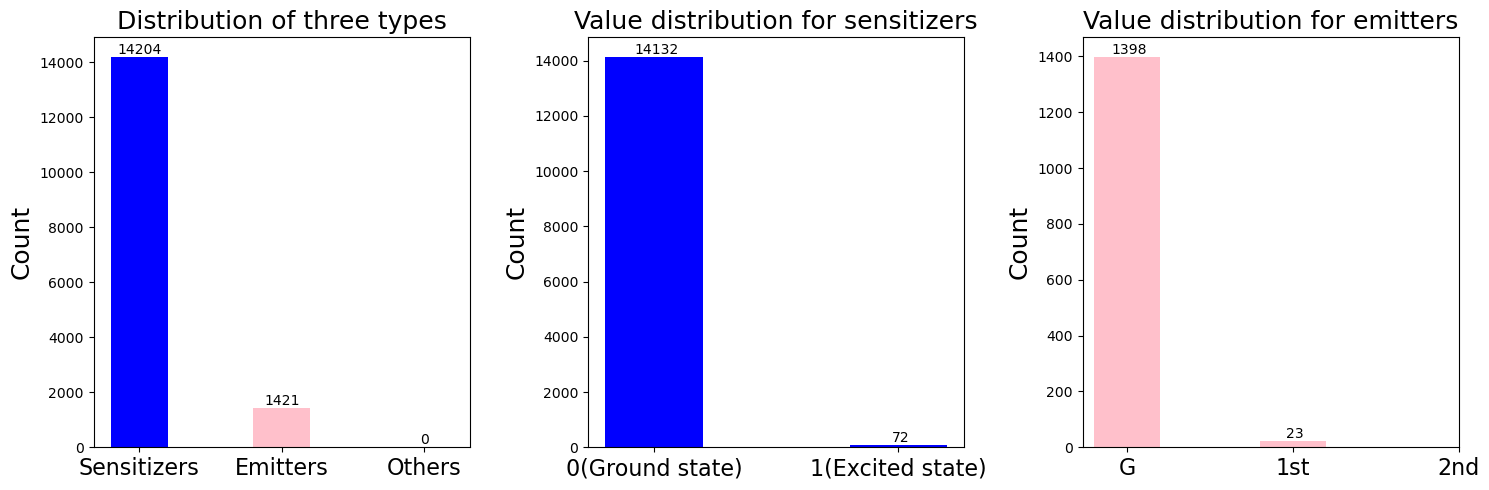

100%|██████████| 1000/1000 [00:04<00:00, 212.31it/s]


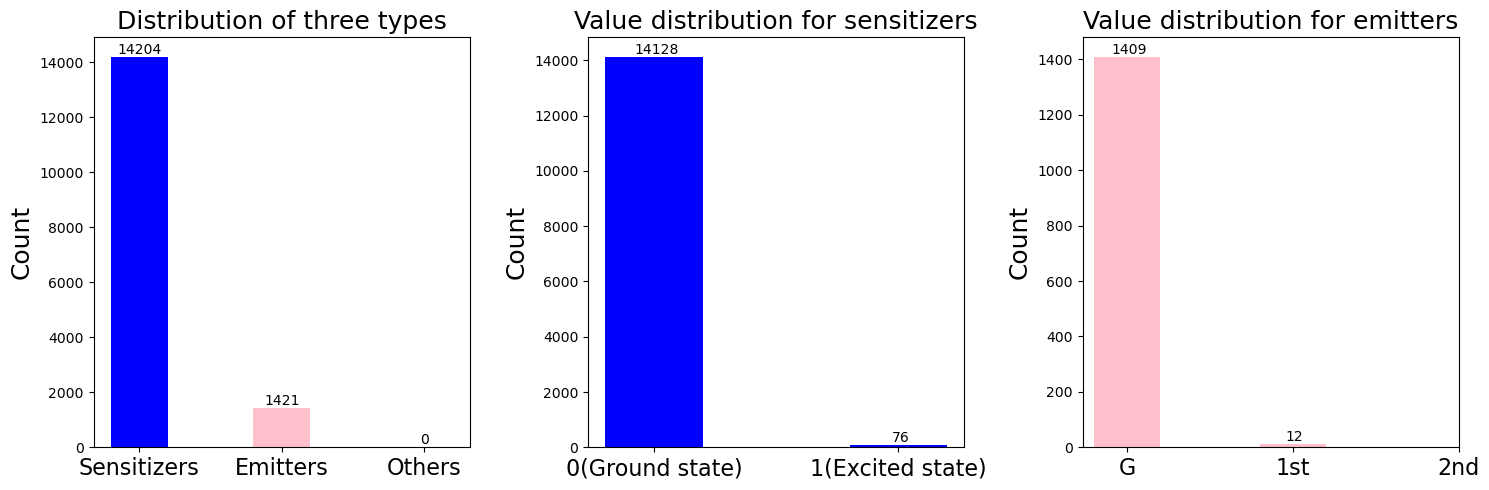

100%|██████████| 1000/1000 [00:04<00:00, 215.94it/s]


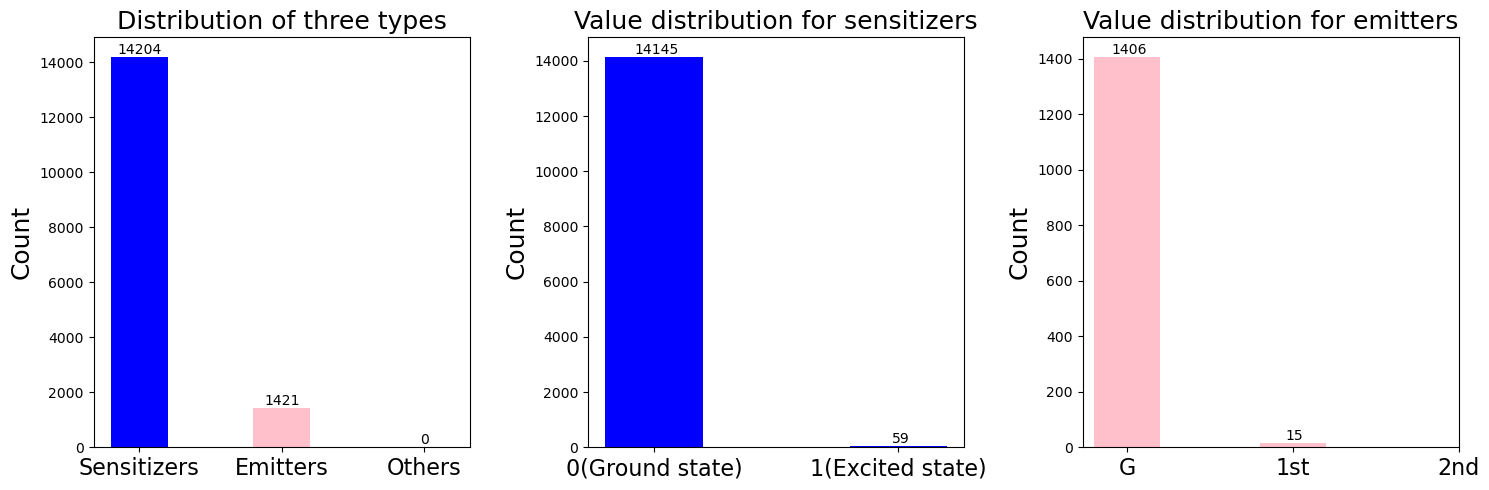

100%|██████████| 1000/1000 [00:04<00:00, 216.85it/s]


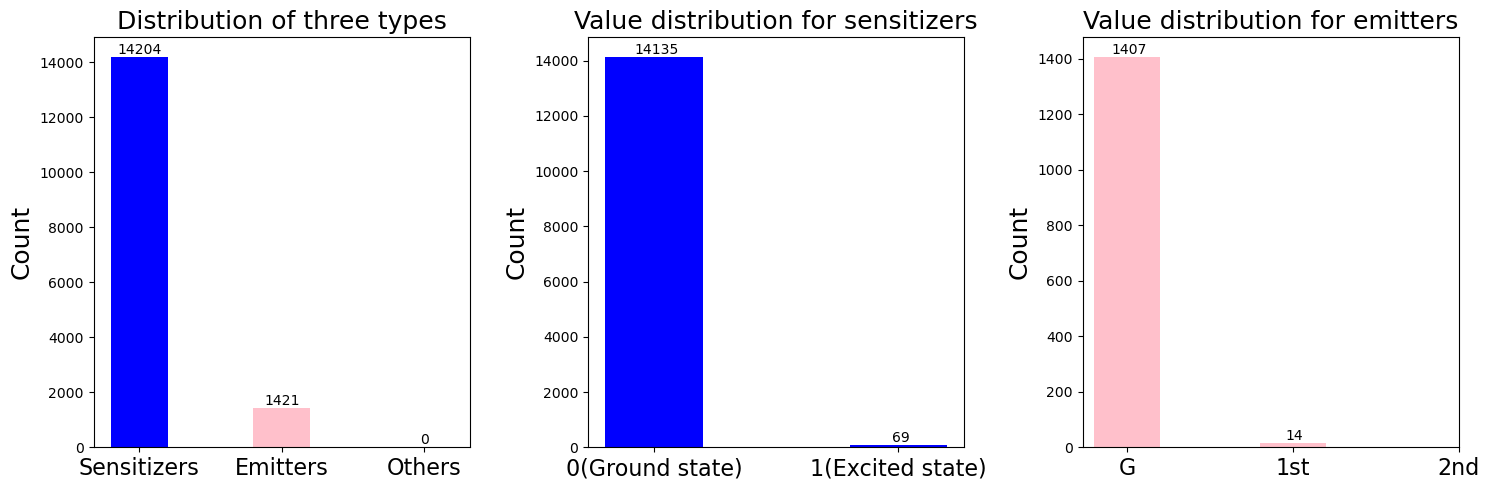

In [11]:
for i in range(10):
    simulator_big.step(1000, 0)
    simulator_big.lattice.plot_distributions()
    